In [1]:
import mne
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import scipy.io as sci
from mne.preprocessing.ica import ICA
%matplotlib inline

In [2]:
m = mne.io.read_raw_brainvision('suj13_l2nap_day2.vhdr',scale=1e6,preload=True)
names = m.ch_names[0:32]
names.append(m.ch_names[61])
names.append(m.ch_names[62])
m.pick_channels(names)
m.filter(1,200)

Extracting parameters from suj13_l2nap_day2.vhdr...
Setting channel info structure...
Reading 0 ... 1805099  =      0.000 ...  1805.099 secs...
Band-pass filtering from 1 - 2e+02 Hz


<RawBrainVision  |  suj13_l2nap_day2.eeg, n_channels x n_times : 34 x 1805100 (1805.1 sec)>

In [2]:
m = mne.io.read_raw_edf('suj5_d2_nap-export_0001.edf', stim_channel=None, preload=True)
m.pick_channels( m.ch_names[0:61])
m.filter(1,40)
print m.ch_names[0:61]

Extracting edf Parameters from suj5_d2_nap-export_0001.edf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 3383767  =      0.000 ...  3383.767 secs...
Ready.
Band-pass filtering from 1 - 40 Hz
[u'P CH1', u'P CH2', u'P CH3', u'P CH4', u'P CH5', u'P CH6', u'P CH7', u'P CH8', u'P CH9', u'P CH11', u'P CH12', u'P CH13', u'P CH14', u'P CH15', u'P CH16', u'P CH17', u'P CH18', u'P CH19', u'P CH20', u'P CH21', u'P CH22', u'P CH23', u'P CH24', u'P CH25', u'P CH26', u'P CH27', u'P CH28', u'P CH29', u'P CH30', u'P CH31', u'P CH32', u'P CH33', u'P CH34', u'P CH35', u'P CH36', u'P CH37', u'P CH38', u'P CH39', u'P CH40', u'P CH41', u'P CH42', u'P CH43', u'P CH44', u'P CH45', u'P CH46', u'P CH47', u'P CH48', u'P CH49', u'P CH50', u'P CH51', u'P CH52', u'P CH53', u'P CH54', u'P CH55', u'P CH56', u'P CH57', u'P CH58', u'P CH59', u'P CH60', u'P CH61', u'P CH62']


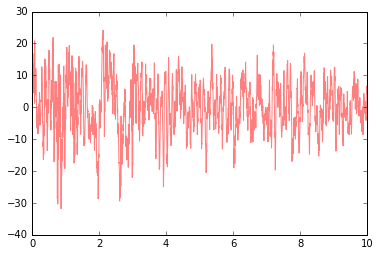

In [3]:
data = m._data
x = np.arange(0,10.000,.001)
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(x, data[1][0:10000], color='red', label="O1", alpha=0.5)
scipy.io.savemat('ICA_vhdr.mat',mdict={'arr':m._data})

In [5]:
picks = mne.pick_types(m.info,meg=False,eeg=True,eog=False,stim=False)
m.notch_filter(np.arange(60,241,60),picks=picks)

<RawBrainVision  |  suj20_l2nap_day2.eeg, n_channels x n_times : 8 x 1807250 (1807.2 sec)>

In [3]:
ica = ICA(n_components=None, n_pca_components=None, max_pca_components=None, max_iter=5000, noise_cov=None, random_state=5)
picks = mne.pick_types(m.info, meg=False, eeg=True, eog=False, stim=False)
print m
ica.fit(m, picks=picks, decim=3, reject=dict(mag=4e-12, grad=4000e-13))
ica.detect_artifacts(m, eog_ch=['LOc','ROc'], eog_criterion=0.5)
clean_raw = ica.apply(m, n_pca_components=None, exclude=ica.exclude)
clean_raw.filter(1, 40)
print clean_raw
#scipy.io.savemat('ICA_filtered.mat',mdict={'arr':clean_raw._data})

<RawBrainVision  |  suj13_l2nap_day2.eeg, n_channels x n_times : 34 x 1805100 (1805.1 sec)>
Fitting ICA to data using 34 channels. 
Please be patient, this may take some time
Inferring max_pca_components from picks.
Using all PCA components: 34
    Searching for artifacts...
    found 2 artifacts by EOG 00
    found 2 artifacts by EOG 01
    found 1 artifact by skewness
    found 1 artifact by kurtosis
    found 1 artifact by variance
Artifact indices found:
    6, 14, 14, 25, 4, 31, 0
    Removing duplicate indices...
Ready.
Transforming to ICA space (34 components)
Zeroing out 6 ICA components
Band-pass filtering from 1 - 40 Hz
<RawBrainVision  |  suj13_l2nap_day2.eeg, n_channels x n_times : 34 x 1805100 (1805.1 sec)>


In [13]:
for index in range(len(m._data)):
    for val in m._data[index]:
        if(np.isinf(val)):
            print val, index

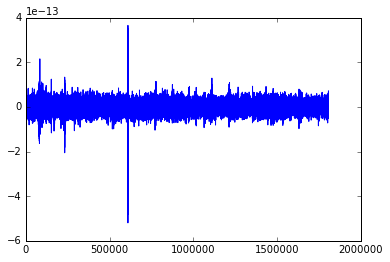

In [20]:
plt.plot(clean_raw._data[3])

In [4]:
print len(names[:-2])
clean_raw.pick_channels(names[:-2])
len(names[0:-2])
print clean_raw._data

32
[[  9.99200722e-16   5.70617324e-01   1.11558663e+00 ...,  -5.59741285e+00
   -2.84513027e+00   3.74700271e-15]
 [  2.60902411e-15   8.71834365e-01   1.70166808e+00 ...,  -3.67914951e+00
   -1.87769693e+00   4.27435864e-15]
 [  1.88737914e-15   4.77271910e-01   9.22926806e-01 ...,  -5.76650561e+00
   -2.91571670e+00   4.99600361e-15]
 ..., 
 [  3.99680289e-15   1.09894315e+00   2.15786869e+00 ...,   1.49547287e+00
    7.35010280e-01  -2.88657986e-15]
 [  5.55111512e-16   5.05886470e-01   9.79474786e-01 ...,   2.47383228e+00
    1.27497434e+00  -4.16333634e-15]
 [ -4.44089210e-16   4.81438392e-01   9.42936902e-01 ...,  -6.25828853e+00
   -3.18424639e+00   5.99520433e-15]]


In [7]:
scipy.io.savemat('edf_ICA_channels.mat',mdict={'arr':m._data})

In [6]:
file1 = sci.loadmat('s13_ICA_channels1.mat')['arr']
print len(file1), len(file1[0])
file2 = sci.loadmat('s13_ICA_channels2.mat')['arr']
print len(file2), len(file2[0])
files = []

for fil in file1:
    files.append(fil)
for fil2 in file2:
    files.append(fil2)
print len(files)
sci.savemat('s13_ICA_channelsFull.mat',mdict={'arr':files})

32 1805100
29 1805100
61


In [1]:
import json as simplejson
import scipy.io as sci

data = sci.loadmat('edf_ICA_channels.mat')['arr']
temp = [[None for j in range(len(data[0]))] for i in range(len(data))]

In [2]:
print "start"

for i in range(len(data)/8):
    print i
    for j in range(len(data[0])):
        temp[i][j] = data[i][j]

#fi =data.tolist()[:10]

start
0
1
2
3
4
5
6


In [3]:
with open('media/json/ica_data.json', 'w+') as f:
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': temp}))

MemoryError: 